In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
import os
print(os.listdir("../input"))

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
train = pd.read_csv('../input/train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

# Visualize data

### each row is 28*28=784 pixels + 1 label in the begining

In [5]:
X_train = (train.iloc[:,1:].values)
y_train = (train.iloc[:,0].values)

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

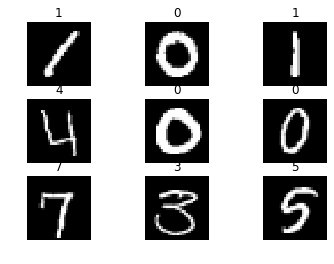

In [7]:
for i in range(0, 9):
    plt.subplot(330+(i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(y_train[i]);

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

# normalize 

In [9]:
def Normalize(X): 
    X=X / 255.0
    mean_px = X.mean()
    std_px = X.std()
    return (X-mean_px)/std_px.astype(np.float32)

In [10]:
X_train = Normalize(X_train)

# one-hot y

In [11]:
# from keras.utils.np_utils import to_categorical
# y_train= to_categorical(y_train)
# num_classes = y_train.shape[1]
# num_classes

In [12]:
def history_plot(history):
    plt.figure(figsize=[15,7])
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# USE TensorFlow

In [13]:
import tensorflow as tf

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# ANN

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 5s 154us/sample - loss: 0.2627 - acc: 0.9203 - val_loss: 0.1485 - val_acc: 0.9542
Epoch 2/10
33600/33600 [==============================] - 4s 128us/sample - loss: 0.1272 - acc: 0.9597 - val_loss: 0.1359 - val_acc: 0.9600
Epoch 3/10
33600/33600 [==============================] - 4s 127us/sample - loss: 0.0907 - acc: 0.9720 - val_loss: 0.1007 - val_acc: 0.9683
Epoch 4/10
33600/33600 [==============================] - 4s 128us/sample - loss: 0.0768 - acc: 0.9746 - val_loss: 0.1115 - val_acc: 0.9686
Epoch 5/10
33600/33600 [==============================] - 4s 128us/sample - loss: 0.0637 - acc: 0.9793 - val_loss: 0.1066 - val_acc: 0.9681
Epoch 6/10
33600/33600 [==============================] - 4s 128us/sample - loss: 0.0547 - acc: 0.9826 - val_loss: 0.1049 - val_acc: 0.9726
Epoch 7/10
33600/33600 [==============================] - 4s 128us/sample - loss: 0.0518 - acc: 0.9823 - val_lo

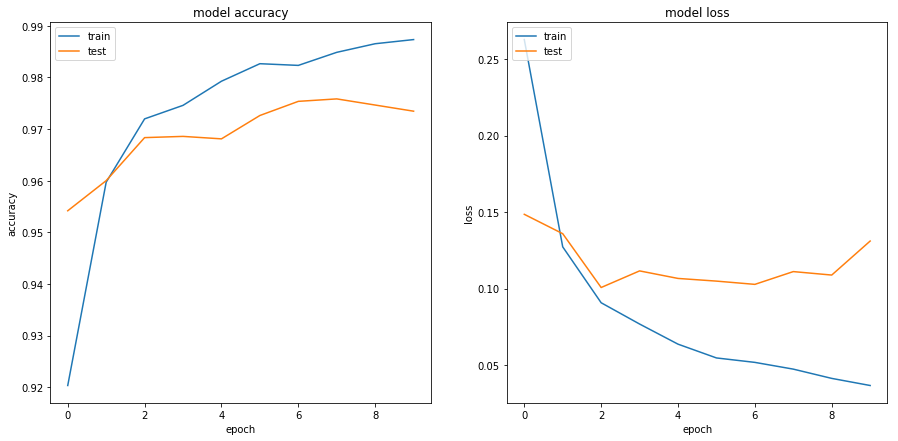

In [14]:
annmodel = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28,1)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
annmodel.compile(optimizer='adam',
              #loss='categorical_crossentropy',#you need to convert to one-hot label
              loss='sparse_categorical_crossentropy', # no need of one-hot label
              metrics=['accuracy'])

history = annmodel.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
history_plot(history)

# CNN

In [15]:
cnnmodel = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
cnnmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [16]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.995):
          print("\nReached 99.5% accuracy so cancelling training!")
          self.model.stop_training = True

callbacks = myCallback()

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 7s 220us/sample - loss: 0.1514 - acc: 0.9544 - val_loss: 0.0633 - val_acc: 0.9795
Epoch 2/10
33600/33600 [==============================] - 5s 156us/sample - loss: 0.0480 - acc: 0.9852 - val_loss: 0.0531 - val_acc: 0.9854
Epoch 3/10
33600/33600 [==============================] - 5s 155us/sample - loss: 0.0326 - acc: 0.9891 - val_loss: 0.0463 - val_acc: 0.9855
Epoch 4/10
33600/33600 [==============================] - 5s 156us/sample - loss: 0.0239 - acc: 0.9922 - val_loss: 0.0427 - val_acc: 0.9871
Epoch 5/10
33600/33600 [==============================] - 5s 156us/sample - loss: 0.0183 - acc: 0.9940 - val_loss: 0.0385 - val_acc: 0.9892
Epoch 6/10
33280/33600 [============================>.] - ETA: 0s - loss: 0.0137 - acc: 0.9953
Reached 99.5% accuracy so cancelling training!
33600/33600 [==============================] - 5s 155us/sample - loss: 0.0136 - acc: 0.9954 - val_loss: 0.046

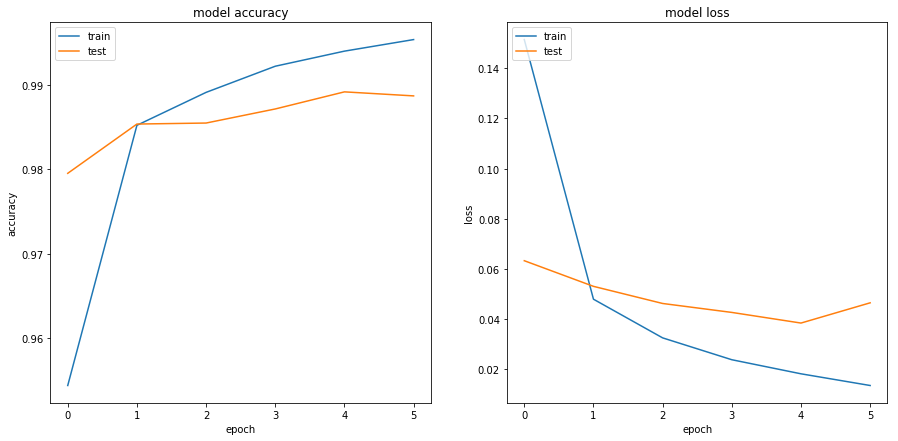

In [17]:
cnnmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history =cnnmodel.fit(X_train, y_train, batch_size=32, epochs=10,validation_split=0.2,callbacks=[callbacks])
history_plot(history)

## visualize each conv layer

In [18]:
from tensorflow.keras import models

def convLayerPlot(model,layer_number,CONV_number,image_source,image_numbers):
    f, axarr = plt.subplots(len(image_numbers),layer_number)
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

    for x in range(0,layer_number):
        for i,n in enumerate(image_numbers):
            f1 = activation_model.predict(image_source[n].reshape(1, 28, 28, 1))[x]
            axarr[i,x].imshow(f1[0, : , :, CONV_number], cmap='inferno')
            axarr[i,x].grid(False)

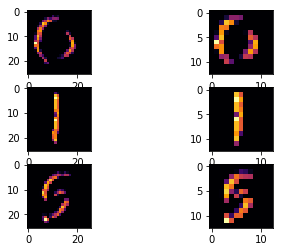

In [19]:
convLayerPlot(cnnmodel,2,0,X_train,[1,2,8])

# check pixel importance

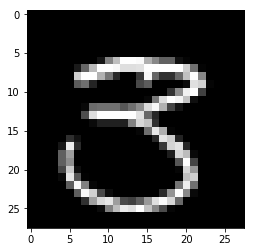

In [20]:
testpic=np.array(X_train[7])
plt.imshow(testpic.reshape(28, 28), cmap=plt.get_cmap('gray'))

### if some of the pixels are changed, how the prediction will be impacted?

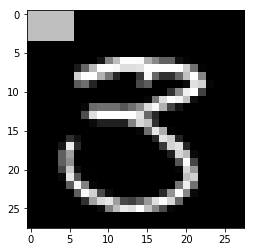

In [21]:
testpic[0:4,0:6,0]=2
plt.imshow(testpic.reshape(28, 28), cmap=plt.get_cmap('gray'))

In [22]:
cnnmodel.predict(testpic.reshape(1,28,28,1))[0][3]

1.0

## the prediction is still very good

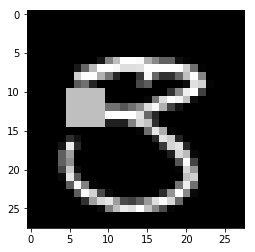

In [23]:
testpic=np.array(X_train[7])
testpic[10:15,5:10,0]=2
plt.imshow(testpic.reshape(28, 28), cmap=plt.get_cmap('gray'))

In [24]:
cnnmodel.predict(testpic.reshape(1,28,28,1))[0][3]

0.98923767

### the prediction dropped as expected

### let's check which of the pixels will impact the prediction most.
### a k*k box will iterate over the hole picture, the pixels inside the box will be feed into the model
### and make prediction.  The reduce of the prediction confidence will be added to a blank picture.

### the final result will be the overlay of imapct area picture and the original image.

In [25]:
import random

In [26]:
def affectingarea(testpic,maxsize,model,alpha=0.3):
    r,c=len(testpic),len(testpic[0])
    pred=model.predict(testpic.reshape(1,r,c,1))
    predclass=np.argmax(pred)
    origpred=pred[0][predclass]
    minv,maxv = np.amin(testpic),np.amax(testpic)
    #print(minv,maxv)
    importance=np.zeros((r,c))
    for size in range(1,maxsize):
        for i in range(0,r+1-size):
            for j in range(0,r+1-size):
                #area=[i+x,j+y for x in range(size) for y in range(size)]
                temppic=np.array(testpic)
                temppic[i:i+size,j:j+size,0] = random.uniform(minv,maxv)
                predict=model.predict(temppic.reshape(1,r,c,1))[0][predclass]
                importance[i:i+size,j:j+size]+=(1-predict)/(size**2)  #normalized by num of pixels 
    plt.imshow(importance,cmap=plt.get_cmap('Reds'))
    plt.imshow(testpic.reshape(r,c), cmap=plt.get_cmap('gray'),alpha=alpha)
    return importance

## try on 0-9s

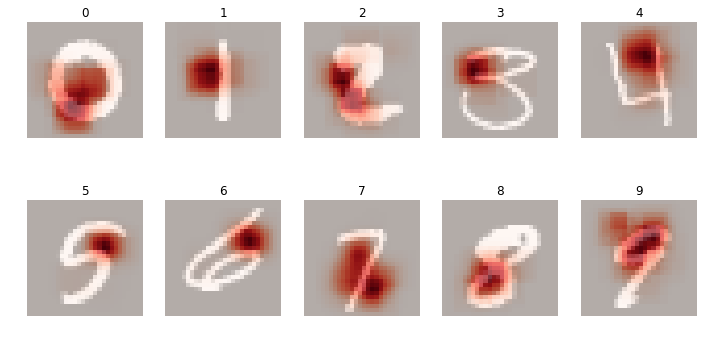

In [28]:
numberlist=[1,2,16,7,3,8,21,18,10,11]
plt.figure(figsize=(12,6))
for i,n in enumerate(numberlist):
    plt.subplot(2,5,i+1)
    imp=affectingarea(X_train[n],10,cnnmodel)
    #plt.imshow(X_train[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(y_train[n]);

### As in the image, the red area will imapct the classification most.
### some of them makes sense to me, such as for 3 and 8, they will be confused to each other if the red area is not clear.
### 4 and 5  can be confused into 9 if the red area isn't clear

## In some sense it shows the model works well as the place that confuse the model will also confuse human

### try on ANN as well 

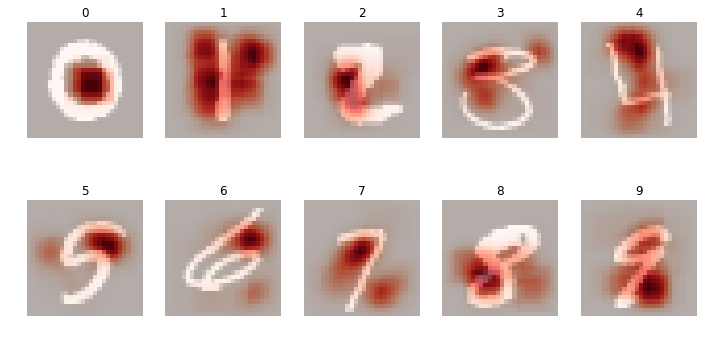

In [29]:
plt.figure(figsize=(12,6))
for i,n in enumerate(numberlist):
    plt.subplot(2,5,i+1)
    imp=affectingarea(X_train[n],10,annmodel)
    #plt.imshow(X_train[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(y_train[n]);

### it seems more area will impact the prediction, which means the model may not be as robust as cnn model